In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [234]:
data = pd.read_csv("../data/data_.csv")

In [235]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,GroupType
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,standart
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,standart
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,standart
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,standart
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,standart


In [236]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [237]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [238]:
data.loc[data.GroupType == 'standart', 'GroupType'] = 0
data.loc[data.GroupType == 'reserve', 'GroupType'] = 2
data.loc[data.GroupType == 'ballast', 'GroupType'] = 3

data.loc[data.Gender == 'Female', 'Gender'] = 0
data.loc[data.Gender == 'Male', 'Gender'] = 1

data.loc[data.OverTime == 'Yes', 'OverTime'] = 1
data.loc[data.OverTime == 'No', 'OverTime'] = 0

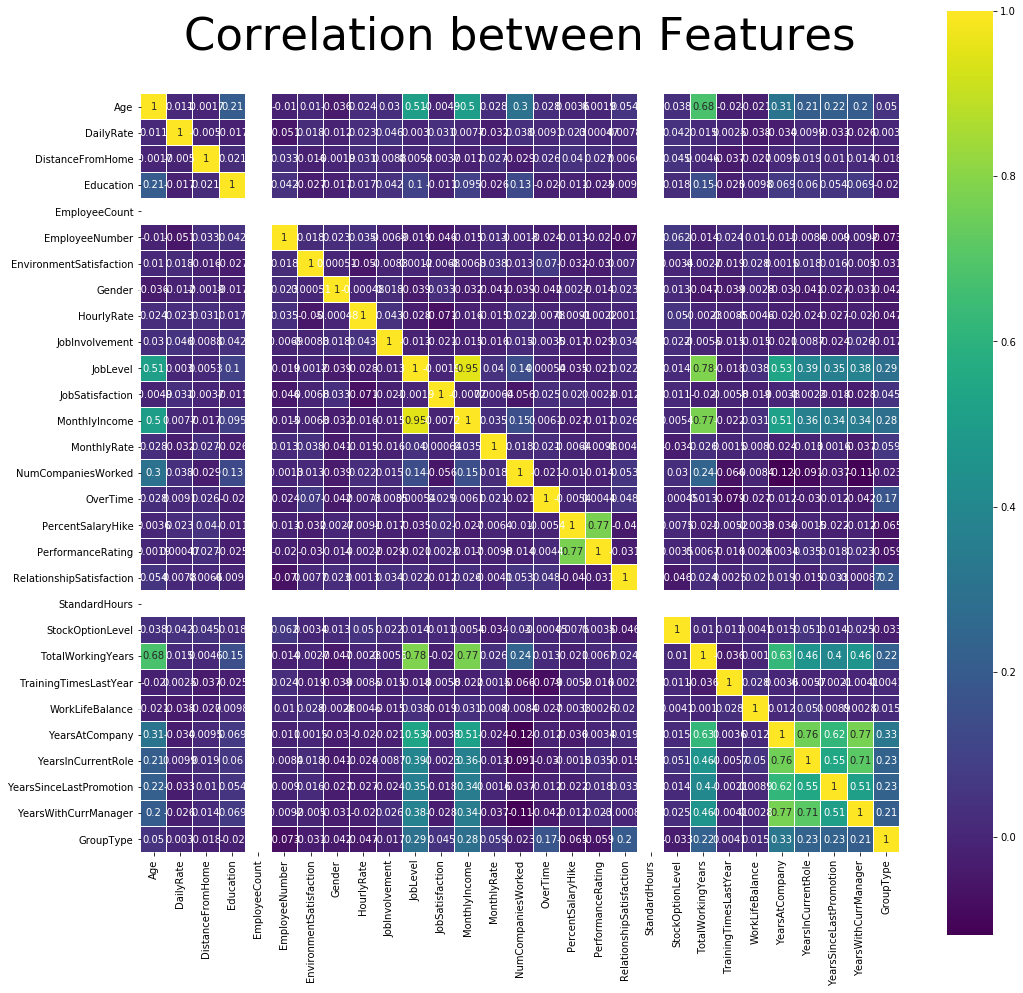

In [239]:
colormap = plt.cm.viridis
plt.figure(figsize=(17,17))
plt.title('Correlation between Features', y=1.05, size = 45)
sns.heatmap(data.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

In [242]:
X_train = data.drop(['GroupType', 'Over18','Attrition', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'BusinessTravel'], axis=1)
y_train = data['GroupType']

In [251]:
rforest_checker = RandomForestClassifier(random_state = 0)
rforest_checker.fit(X_train, y_train)
importances_df = pd.DataFrame(rforest_checker.feature_importances_, columns=['Feature_Importance'],
                              index=X_train.columns)
importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
print(importances_df)

                          Feature_Importance
RelationshipSatisfaction            0.130250
JobLevel                            0.113386
YearsAtCompany                      0.107170
MonthlyIncome                       0.097623
JobSatisfaction                     0.077838
Age                                 0.055995
YearsInCurrentRole                  0.044773
OverTime                            0.038011
YearsWithCurrManager                0.036934
TotalWorkingYears                   0.036243
EmployeeNumber                      0.033353
DailyRate                           0.029774
MonthlyRate                         0.029619
YearsSinceLastPromotion             0.028186
HourlyRate                          0.024567
NumCompaniesWorked                  0.018559
DistanceFromHome                    0.018150
PercentSalaryHike                   0.015548
TrainingTimesLastYear               0.011847
Education                           0.011388
EnvironmentSatisfaction             0.009948
JobInvolve

In [252]:
X_train = X_train.drop(['StandardHours', 'EmployeeCount'], axis=1)

In [256]:
params_rforest = [{'n_estimators': [200, 300],
                   'max_depth': [5, 7, 10],
                   'min_samples_split': [2, 4]}]
grid_rforest = GridSearchCV(estimator = RandomForestClassifier(criterion = 'gini', 
                                                               random_state = 0, n_jobs=-1),
                            param_grid = params_rforest,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs=-1)
grid_rforest = grid_rforest.fit(X_train, y_train)
best_acc_rforest = grid_rforest.best_score_
best_params_rforest = grid_rforest.best_params_

In [257]:
best_acc_rforest

0.9700680272108844